## Лабораторная работа "Линейные модели"

Некоторые задачи в этом ноутбуке надо будет сдавать в [контест](https://new.contest.yandex.ru/60377/start). Когда сдаете туда код, не забудьте сверху прописать все нужные импорты.

Мы рассчитываем, что перед тем, как садиться за этот ноутбук, вы прочитали часть про регрессию главы "Линейные модели" хендбука по ML.

Начнём с загрузки необходимых библиотек и функций.

Параметр `seed` будет использоваться далее для инициализации генератора случайных чисел из библиотеки `numpy`.

In [11]:
import numpy as np
import pandas as pd
from typing import Optional, List

import sklearn.base

seed = 24

В этом ноутбуке мы будем практиковаться на датасете ["The Ames Iowa Housing Data"](https://www.openml.org/d/41211). Здесь собраны описания и цены жилья в городе Эймс, штат Айова. Мы будем решать задачу предсказания цены (`Sale_Price`) по всем остальным признакам.

И начнём мы, конечно, с того, что внимательно посмотрим на датасет: какие там есть объекты и какие признаки.

In [9]:
data = pd.read_csv('./data.csv')

data.sample(20)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1845,Two_Story_PUD_1946_and_Newer,Floating_Village_Residential,24,2117,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,9,2007,WD,Normal,177000,-93.645639,42.046145
194,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,50,6000,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,4,2010,WD,Abnorml,134000,-93.624566,42.033563
2535,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,70,8400,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Good_Wood,NaN,0,11,2006,WD,Normal,138500,-93.627517,42.045885
2357,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,78,10140,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Good_Privacy,NaN,0,1,2006,WD,Normal,181000,-93.630289,42.049770
2041,Two_Family_conversion_All_Styles_and_Ages,Residential_Medium_Density,60,10120,Pave,No_Alley_Access,Slightly_Irregular,Bnk,AllPub,Inside,...,Minimum_Privacy,NaN,0,1,2007,WD,Normal,122000,-93.622025,42.025893
2674,Two_Family_conversion_All_Styles_and_Ages,Residential_Medium_Density,65,7800,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,5,2006,WD,Normal,119900,-93.620433,42.033369
1192,Two_Story_1946_and_Newer,Residential_Low_Density,73,8814,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,6,2008,WD,Normal,141000,-93.626436,42.045854
2264,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,42,10331,Pave,No_Alley_Access,Regular,Lvl,AllPub,CulDSac,...,No_Fence,NaN,0,7,2007,WD,Normal,174000,-93.646617,41.998023
1450,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,88,7990,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,4,2008,WD,Normal,110000,-93.684289,42.021275
2686,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,90,33120,Pave,No_Alley_Access,Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,10,2006,WD,Normal,220000,-93.622773,42.026860


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

Разобьём данные на обучающую и тестовую выборки.

In [12]:
from sklearn.model_selection import train_test_split

target_column = "Sale_Price"
np.random.seed(seed)

test_size = 0.2
data_train, data_test, Y_train, Y_test = train_test_split(
    data[data.columns.drop("Sale_Price")],
    np.array(data["Sale_Price"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (2344, 80) (2344,)
Test : (586, 80) (586,)


Среди признаков нам встретятся как вещественные, так и категориальные. Пока что выделим в качестве категориальных те, значениями которых являются не числа, а какие-то другие сущности (но имейте в виду, что численные с виду признаки тоже могут быть категориальными).

In [15]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]

continuous_columns.remove(target_column)

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")

Continuous : 34, Categorical : 46


Посмотрим на заголовки признаков. В целом, многие названия вполне говорящие, и можно догадаться, что стоит за этими признаками.

In [16]:
continuous_columns

['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Year_Remod_Add',
 'Mas_Vnr_Area',
 'BsmtFin_SF_1',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Garage_Area',
 'Wood_Deck_SF',
 'Open_Porch_SF',
 'Enclosed_Porch',
 'Three_season_porch',
 'Screen_Porch',
 'Pool_Area',
 'Misc_Val',
 'Mo_Sold',
 'Year_Sold',
 'Longitude',
 'Latitude']

Одна из целей этого ноутбука — познакомить вас с fit-predict (fit-transform) интерфейсом, типичным для многих реализаций моделей машинного обучения и для различных инструментов работы с данными.

Множество фреймворков машинного обучения (например, scikit-learn, CatBoost) содержат в себе модели и алгоритмы, которые описаны в виде классов, у которых есть два ключевых метода: fit и predict (transform). Давайте разберёмся, что делают эти методы.

***fit*** — метод для обучения алгоритма. Он получает на входе данные и таргеты для обучения, после чего обновляет состояние класса. После использования метода fit считается, что объект класса готов к использованию. Внутри этого метода может быть что угодно: обучение модели, подбор гиперпараметров, подсчет статистик и т. д.

***predict*** — метод для предсказания , обученного с помощью _fit_. В задаче регрессии это оценка параметра, в задаче классификации предсказанный класс.

***transform*** — стилистический синоним _predict_, но используется в классах, которые реализуют преобразования данных, например, масштабирование признаков или кодирование категориальных фичей.

***fit_transform*** — метод который учится на данных, а потом их же преобразовывает.

### 1. Базовая предобработка данных

Отметим два важных свойства линейной регрессии:

- строго говоря, она умеет работать только с вещественными признаками
- если признаки имеют разный масштаб при сопоставимой важности, регрессия может проигнорировать те, что имеют меньший масштаб

Первое соображение заставляет придумывать способы борьбы с категориальными признаками, и мы начнём с самого простого: проигнорируем их.

Второе соображение приводит к необходимости приводить признаки к одному масштабу ("нормализовать фичи"). В `sklearn` для этого есть два основных класса:

- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - в каждой колонке вычитает среднее и делит на стандартное отклонение.
- [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - в каждой колонке вычитает минимальное значение и делит на разницу между минимальным и максимальным.

Применяются они в соответствии с описанной выше философией. Например:

```
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

Обратите внимание, что scaler настраивается на обучающей выборке (именно по ней вычисляются среднее и стандартное отклонение), а к тестовой он применяется с уже подсчитанными статистиками.

**Вопрос**. А зачем? Почему бы не нормировать отдельно обучающую и тестовую выборку? Почему бы не настроить наш scaler на объединении двух выборок? Ведь благодаря большему количеству данных мы бы настроили его точнее!
<p>
<details>
  <summary>Кликните, чтобы узнать ответ</summary>

Если мы по-разному отнормируем обучающую и тестовую выборки, то нам будет весьма сложно применять модель, обученную на одной из них, к другой. Это просто не будет иметь физического смысла.

Настраивать что-либо на тестовой выборке — это очень плохая идея. Тестовая выборка должна быть неким независимым мерилом качества наших усилий по предсказанию, а если мы разрешим информации о распределении признаков в тестовой выборке "протечь" в процесс обучения, то мы эту независимость испортим.

</details>

Итак, мы решили делать преобразование данных, которое состоит в:

- сохранении лишь непрерывных фичей;
- нормализации этих фичей (давайте остановимся на [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

В этом пункте вам нужно будет сделать класс такой предобработки данных, причём оформим мы его в виде класса с интерфейсом fit-transform.

Несколько важных соображений:

1. В прошлой лабораторной метод fit у нас ничего не возвращал, но правильнее сделать так, чтобы метод fit возвращал сам класс. В частности, это позволит нам писать model = model.fit().

2. Первоначальный анализ данных удобно делать, когда они лежат в pd.DataFrame, т к у этого класса много методов, которые малым количеством телодвижений позволяют считать статистики и строить графики. Модели же проще учить, когда данные лежат в np.array, потому большое количество библиотек, где реализованы алгоритмы машинного обучения совместимы именно с numpy. Поэтому сделайте так, чтобы метод transform получал на вход pd.Dataframe, а возвращал np.array.

3. В sklearn есть классы, от которых можно отнаследоваться, чтобы сделать класс с [fit-predict](https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html#sklearn.base.RegressorMixin) или [fit-transform](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) интерфейсом. Это очень полезно, т к позволит вам в дальнейшем пользоваться методами [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подобными. В этом пункте отнаследуйтесь от второго.

4. У метода __init__ должен быть параметр ```needed_columns=None```. Туда передается список колонок, которые нужно взять из датафрейме. Делать это надо в ```fit``` и ```transform```. В случае если если он равен None, то класс оставляет все колонки из исходного набора данных.

5. Обратите внимание, что достаточно реализовать `fit` и `transform`, а метод `fit_transform` из них слепит родительский класс.

**Готовый препроцессор вам нужно будет сдать в Контест**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
import pandas as pd
import numpy as np
from typing import Optional, List #, Self - for Python 3.11+


class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None) -> None:
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.needed_columns = needed_columns
        self.scaler = StandardScaler()
        self.fitted_columns = None

    def fit(self, data, *args): # -> Self - for python 3.11+
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        if data is None or data.empty:
            raise ValueError("Data is None or empty")

        # Take columns
        if self.needed_columns is None:
          self.fitted_columns = data.columns.tolist()
        else:
          self.fitted_columns = self.needed_columns

        selected_data = data[self.fitted_columns]

        # Fit Normolizer
        self.scaler.fit(selected_data)

        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        # Normolize
        if not hasattr(self.scaler, 'mean_') or self.scaler.mean_ is None:
          raise ValueError("Fit the model first")

        missing_columns = set(self.fitted_columns) - set(data.columns)
        if missing_columns:
            raise ValueError(f"Missing columns: {missing_columns}")

        normalized_data = self.scaler.transform(data[self.fitted_columns])

        return normalized_data

**1. Сдайте вашу реализацию в Контест, задача «Простая предобработка».**

In [17]:
preprocessor = BaseDataPreprocessor(needed_columns=continuous_columns)

X_train = preprocessor.fit_transform(data_train)
X_test = preprocessor.transform(data_test)

### 1.2 Умная предобработка данных

Теперь давайте попробуем сделать что-нибудь поинтереснее. Для того, чтобы будущие алгоритмы регрессии работали хорошо, они должны обучаться и предсказывать на информативных фичах. Зачастую оказывается гораздо продуктивнее потратить какое-то время на изучение предметной области и придумывание хороших фичей (feature engineering), нежели жадно перебирать все известные алгоритмы машинного обучения.
В этом пункте попробуйте придумать новых фичей и написать новый класс предобработки данных, который их добавляет (а, возможно, и убирает ещё какие-то старые).

В конце этого пункта в раскрывашке перечислены наши идеи относительно того, что можно было добавить.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
import pandas as pd
import numpy as np
from typing import Optional, List

class SmartDataPreprocessor(TransformerMixin):
  def __init__(self, needed_columns: Optional[List[str]]=None) -> None:
    self.needed_columns = needed_columns
    self.scaler = StandardScaler()
    self.fitted_columns = None
    self.median_values = {}  # medians for blanks
    self.city_center = None  # Corrdinates to the center of the city

  def _find_problematic_zeros(self, data: pd.DataFrame) -> None:
    threshold = 0.1 # If more than 10% of the data is zero, we consider this a problem.
    self.median_values = {}

    for column in data.select_dtypes(include=[np.number]).columns:
        zero_count = (data[column] == 0).sum()
        total_count = len(data)

        if zero_count > 0.1 * total_count and zero_count > 0:
          non_zero_values = data[data[column] != 0][column]
          if len(non_zero_values) > 0:
            self.median_values[column] = non_zero_values.median()

  def _replace_problematic_zeros(self, data: pd.DataFrame) -> pd.DataFrame:
    # Replacing problematic zeros with medians
    processed_data = data.copy()

    for column, median in self.median_values.items():
    # Replace 0 with the median, but only if it is a numeric column
      if column in processed_data.select_dtypes(include=[np.number]).columns:
        mask = processed_data[column] == 0
        # Cast column to float to avoid dtype issues
        processed_data[column] = processed_data[column].astype(float)
        processed_data.loc[mask, column] = median

    return processed_data

  def _find_city_center(self, data) -> None:
    if 'latitude' in data.columns and 'longitude' in data.columns:
        self.city_center = {
            'lat': data['latitude'].mean(),
            'lon': data['longitude'].mean()
        }

  def _add_distance_to_center(self, data: pd.DataFrame) -> pd.DataFrame:
    processed_data = data.copy()

    if self.city_center and 'latitude' in data.columns and 'longitude' in data.columns:
        lat_diff = data['latitude'] - self.city_center['lat']
        lon_diff = data['longitude'] - self.city_center['lon']
        processed_data['distance_to_center'] = np.sqrt(lat_diff**2 + lon_diff**2)

    return processed_data

  def _process_data(self, data: pd.DataFrame) -> pd.DataFrame:
    # preprocess
    processed_data = self._replace_problematic_zeros(data)

    # Add new features
    processed_data = self._add_distance_to_center(processed_data)

    # prepare dataset
    if self.needed_columns is not None:
        additional_features = [col for col in processed_data.columns
                             if col not in self.needed_columns and col not in data.columns]
        selected_columns = self.needed_columns + additional_features
        processed_data = processed_data[selected_columns]

    return processed_data


  def fit(self, data, *args):
    if data is None or data.empty:
      raise ValueError("Data is None or empty")

    # Handling "hidden" gaps (replacing 0 with the median)
    self._find_problematic_zeros(data)

    # Calculating the city center (average coordinates)
    self._find_city_center(data)

    processed_data = self._process_data(data)

    if self.needed_columns is None:
      self.fitted_columns = data.columns.tolist()
    else:
      new_features = [col for col in processed_data.columns
                      if col not in self.needed_columns]
      self.fitted_columns = self.needed_columns + new_features

    selected_data = data[self.fitted_columns]

    self.scaler.fit(processed_data[self.fitted_columns])

    return self

  def transform(self, data: pd.DataFrame) -> np.array:
    if not hasattr(self.scaler, 'mean_') or self.scaler.mean_ is None:
      raise ValueError("Fit the model first")

    missing_columns = set(self.fitted_columns) - set(data.columns)
    if missing_columns:
      raise ValueError(f"Missing columns: {missing_columns}")

    processed_data = self._process_data(data)

    return self.scaler.transform(processed_data[self.fitted_columns])

In [ ]:
preprocessor = SmartDataPreprocessor(needed_columns=continuous_columns)

X_train = preprocessor.fit_transform(data_train)
X_test = preprocessor.transform(data_test)

<details>
  <summary>Пара простых идей. Кликните, когда будете готовы</summary>

Например в датасете есть координаты квартиры, которые по идее сами по себе мало чего дают нашему регрессору. С другой стороны, по ним можно оценить центр города (или просто найти его на карте) и использовать в качестве фичи расстояние до центра города, которое может естественным образом влиять на цену жилья.

Ещё может быть полезным почистить пропуски. И тут есть хитрость. Если вы просто вызовете data.info(), то вам покажется, что пропусков нет, но они могут приходить под разными обличьями. Например, у 490 объектов параметр Lot_Frontage (площадь фасада) равен нулю. Неожиданно, правда? Возможно, мы хотим эти нулевые значения заменить чем-нибудь, скажем, медианой.

</details>


### 2. Линейная регрессия

Давайте получим базовое решение (бейзлайн), чтобы потом с ним можно было сравниваться.

Обучите линейную регрессию на обучающей выборке (которую мы подвергли преобразованию BaseDataPreprocessor). В библиотеке Sklearn есть релизация [без регуляризации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression), [с L2-регуляризацией](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) и [с L1-регуляризацией](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso).

Начнём с обычной регрессии. Получите предсказания на тестовых данных и оцените на них качество модели. В качестве метрики оценки качества возьмите [средний модуль отклонения](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) (mean absolute error, MAE). Как вам кажется, насколько хорошей вышла модель?


In [ ]:
target_column = "Sale_Price"
np.random.seed(seed)

test_size = 0.2
data_train, data_test, Y_train, Y_test = train_test_split(
    data[data.columns.drop("Sale_Price")],
    np.array(data["Sale_Price"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (2344, 80) (2344,)
Test : (586, 80) (586,)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

# preprocess the data
preprocessor = BaseDataPreprocessor(needed_columns=continuous_columns)
X_train_processed = preprocessor.fit_transform(data_train)
X_test_processed = preprocessor.transform(data_test)

# Fit the model
linear_model = LinearRegression()
linear_model.fit(X_train_processed, Y_train)

# Get predection
y_pred_linear = linear_model.predict(X_test_processed)

# Evaluate
mae_linear = mean_absolute_error(Y_test, y_pred_linear)
print(f"Linear Regression MAE: {mae_linear:.2f}")

# additional checking
from sklearn.metrics import mean_squared_error, r2_score

mse_linear = mean_squared_error(Y_test, y_pred_linear)
r2_linear = r2_score(Y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Linear Regression R²: {r2_linear:.4f}")

Linear Regression MAE: 23822.70
Linear Regression MSE: 2522954175.56
Linear Regression R²: 0.5957


Теперь попробуйте L2-регуляризованную модель Ridge(). Какие значения метрик она даёт?

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_processed, Y_train)

y_pred_ridge = ridge_model.predict(X_test_processed)

mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)

print(f"Ridge Regression MAE: {mae_ridge:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")

Ridge Regression MAE: 23821.98
Ridge Regression MSE: 2521290395.66
Ridge Regression R²: 0.5959


In [ ]:
print("=== Compare Models ===")
print(f"{'Model':<20} {'MAE':<10} {'MSE':<10} {'R²':<10}")
print("-" * 50)
print(f"{'Linear Regression':<20} {mae_linear:<10.2f} {mse_linear:<10.2f} {r2_linear:<10.4f}")
print(f"{'Ridge (alpha=1.0)':<20} {mae_ridge:<10.2f} {mse_ridge:<10.2f} {r2_ridge:<10.4f}")

=== Compare Models ===
Model                MAE        MSE        R²        
--------------------------------------------------
Linear Regression    23822.70   2522954175.56 0.5957    
Ridge (alpha=1.0)    23821.98   2521290395.66 0.5959    


In [ ]:
# Let's look at the model weights
print("\n=== COEFFICIENT ANALYSIS ===")
print(f"Linear Regression - number of features: {len(linear_model.coef_)}")
print(f"Ridge Regression - number of features: {len(ridge_model.coef_)}")

# Let's compare the coefficient values
print(f"\nMaximum Linear coefficient: {np.max(np.abs(linear_model.coef_)):.4f}")
print(f"Maximum Ridge coefficient: {np.max(np.abs(ridge_model.coef_)):.4f}")

print(f"\nMean Linear coefficient: {np.mean(np.abs(linear_model.coef_)):.4f}")
print(f"Mean Ridge coefficient: {np.mean(np.abs(ridge_model.coef_)):.4f}")


=== COEFFICIENT ANALYSIS ===
Linear Regression - number of features: 34
Ridge Regression - number of features: 34

Maximum Linear coefficient: 23315.1861
Maximum Ridge coefficient: 23269.7789

Mean Linear coefficient: 5067.4795
Mean Ridge coefficient: 5063.0869


In [ ]:
# Let's try different regularization coefficients
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

print("\n=== EXPERIMENT WITH DIFFERENT ALPHAS ===")
for alpha in alphas:
  ridge_temp = Ridge(alpha=alpha)
  ridge_temp.fit(X_train_processed, Y_train)
  y_pred_temp = ridge_temp.predict(X_test_processed)
  mae_temp = mean_absolute_error(Y_test, y_pred_temp)
  print(f"Alpha = {alpha:<6} -> MAE = {mae_temp:.2f}")


=== EXPERIMENT WITH DIFFERENT ALPHAS ===
Alpha = 0.01   -> MAE = 23822.69
Alpha = 0.1    -> MAE = 23822.62
Alpha = 1.0    -> MAE = 23821.98
Alpha = 10.0   -> MAE = 23816.34
Alpha = 100.0  -> MAE = 23857.71


В целом, регуляризация редко портит модель, но важно правильно подобрать коэффициент регуляризации. Как именно — поговорим дальше.

### 3. Выбор метрики

Средний модуль ошибки (MAE) — в целом довольно хорошая метрика для задачи регрессии, потому что ее довольно легко проинтерпретировать. Но с ней есть одна проблема: ошибиться на $ 10 000 $ USD в предсказании цены квартиры стоимостью $ 100 000 $ USD страшнее чем допустить такую ошибку в предсказании цены жилья за $ 700 000 $ USD. Иными словами более показательной метрикой будет не абсолютная  ошибка $ error_i = |y_i - \hat{y_i}|$, а логарифм относительной ошибки $error_i = log \frac{y_i}{\hat{y_i}} $. Также давайте обычное усреднение по всем примерам в тестовой выборке заменим на среднеквадратичное $ \frac{1}{N} \sum_i^{test} {error_i} \longrightarrow \sqrt{\frac{1}{N} \sum_i^{test}{(error_i)^2}}$. Итоговая метрика получается равной:

$$
Metric = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (log(y_i) - log(\hat{y_i}))^2}
$$

Логично? Да. Но возникает еще одна проблема. Логарифм нельзя брать от отрицательного числа. Бороться с этим можно двумя способами.
- Случай когда отрицательное число затисалось в target-ax не очень разумен, т. к. цена на дом не может быть отрицательной. В этом случае стоит кинуть ошибку, чтобы пользователь этой функции еще раз перепроверил правильные ли таргеты он подает.
- В целом, у нас нет гарантий того, что наша модель (например линейная) предсказывает только положительные числа. Брать логарифм от отрицательного числа не получится, но качество такой модели все еще надо оценить. Давайте все предсказания, которые меньше некоторого порога $ a_{min} $, заменять этим порогом ($ \hat{y_i} \longleftarrow max(\hat{y_i}, a_{min}) $), после чего подавать их в метрику. Для прохождения тестов возьмите $ a_{min} = 1 $.

**2. Реализуйте эту метрику и сдайте в контест**.

 RMSLE (Root Mean Squared Logarithmic Error):

```
Metric = sqrt(1/N * Σ(log(y_i + 1) - log(ŷ_i + 1))²)
```



In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def root_mean_squared_logarithmic_error(y_true, y_pred, a_min=1.):
  """
  Root Mean Squared Logarithmic Error
  :param y_true: actual values
  :param y_pred: predicted values
  :param a_min: minimum value for predictions (default 1)
  :return: RMSLE value
  """
  # Check that all actual values ​​are positive
  if np.any(y_true <= 0):
    raise ValueError("All actual values ​​must be positive!")

  # Replace predictions less than amin with amin
  y_pred_clipped = np.maximum(y_pred, a_min)

  # Calculate logarithms
  log_true = np.log1p(y_true) # log1p(x) = log(x + 1)
  log_pred = np.log1p(y_pred_clipped)

  # Calculate RMSLE
  return np.sqrt(mean_squared_error(log_true, log_pred))

In [28]:
import numpy as np
def root_mean_squared_logarithmic_error(y_true, y_pred, a_min=1.):
    if (y_true < 0).any():
        raise ValueError("y_true contains negative values")

    y_pred_clipped = np.maximum(y_pred, a_min)

    return np.sqrt(np.mean((np.log(y_true) - np.log(y_pred_clipped)) ** 2))

In [ ]:
# Calculate RMSLE for our models
rmsle_linear = root_mean_squared_logarithmic_error(Y_test, y_pred_linear)
rmsle_ridge = root_mean_squared_logarithmic_error(Y_test, y_pred_ridge)

print("=== COMPARE BY RMSLE ===")
print(f"Linear Regression RMSLE: {rmsle_linear:.4f}")
print(f"Ridge Regression RMSLE: {rmsle_ridge:.4f}")

# Compare with MAE for context
print("\n=== COMPARE WITH MAE ===")
print(f"Linear Regression -> MAE: {mae_linear:.2f}, RMSLE: {rmsle_linear:.4f}")
print(f"Ridge Regression -> MAE: {mae_ridge:.2f}, RMSLE: {rmsle_ridge:.4f}")

=== COMPARE BY RMSLE ===
Linear Regression RMSLE: 0.1950
Ridge Regression RMSLE: 0.1950

=== COMPARE WITH MAE ===
Linear Regression -> MAE: 23822.70, RMSLE: 0.1950
Ridge Regression -> MAE: 23821.98, RMSLE: 0.1950


### 4. Логарифмирование таргета.

Вообще идея с логарифмированием таргета довольно хороша для этой задачи. Давайте посмотрим на распределение обычных и логарифмированных таргетов.

In [ ]:
import matplotlib.pyplot as plt

def plot_target_distribution(Y_train, Y_test, ax, n_bins=20):
    ax.hist(Y_train, bins=n_bins, label="train", color="red", alpha=0.3, density=True)
    ax.hist(Y_test, bins=n_bins, label="test", color="blue", alpha=0.3, density=True)

    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")


def plot_both_distributions(Y_train, Y_test):
    fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

    plot_target_distribution(Y_train, Y_test, ax=ax0)
    ax0.set_title("Standard")

    plot_target_distribution(np.log(Y_train), np.log(Y_test), ax=ax1)
    ax1.set_title("Logarithmic")

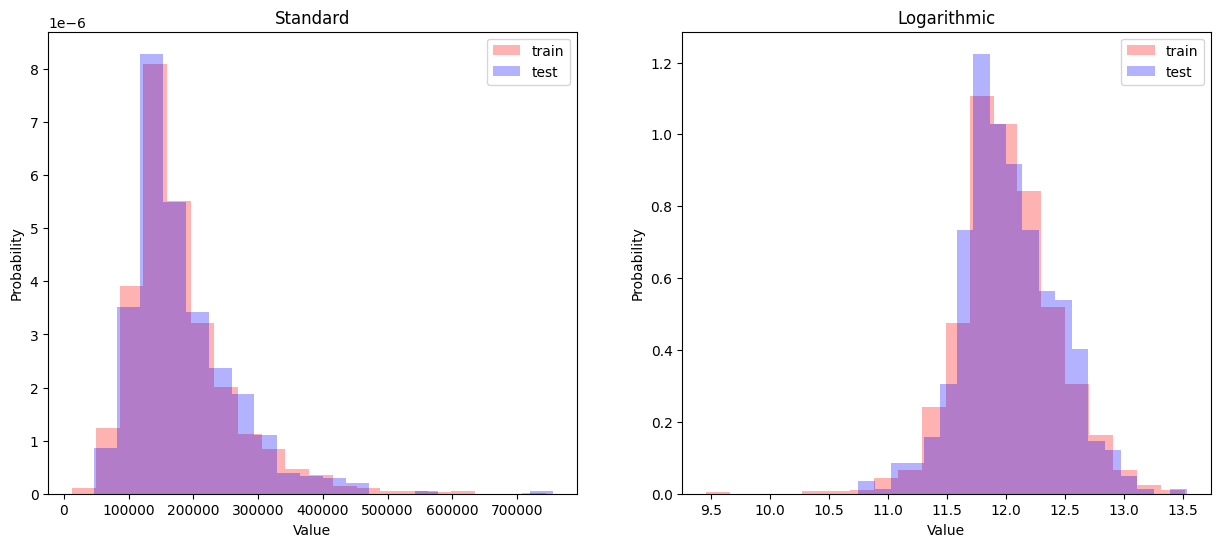

In [ ]:
plot_both_distributions(Y_train, Y_test)

Как видите, если прологарифмировать таргеты, то их распределение станет более похоже на гауссовское. Интуиция подсказывает, что линейная регрессия с MSE loss-функцией должна лучше учиться на таких таргетах.

Попробуйте написать класс, который во время обучения логарифмирует таргет, а во время предсказания — наоборот, экспоненциирует. После чего обучите оба метода на обучающих данных и сравните значения метрик MAE и MSLE на тесте.

Что должно быть в этом классе:
- Класс должен называться ```ExponentialLinearRegression```
- Класс должен иметь такой же fit-predict интерфейс, как и было до этого. На вход он получает оригинальные X и Y, а уже внутри происходит логарифмирование или экспоненциирование.
- Внутри этой модели будет работать [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Хочется, чтобы этому классу можно было передавать аргументы инициализации с помощью *args и **kwargs
- Чтобы потом этот класс можно было использовать в [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) в следующих пунктах, у него должны быть реализованы 5 методов
    1. ```__init__(self, *args, **kwargs)``` - все полученные аргументы передаются дальше в Ridge.
    2. ```fit(self, X, Y)``` - обучает класс, возвращает self.
    3. ```predict(self, X)``` - делает предсказание.
    4. ```get_params(deep=True)``` - возвращает dict с параметрами модели. Больще подробностей [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)
    5. ```set_params(**params)``` - передает нужные параметры в модель. Больше подробносте [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)
- Есть два подхода к тому как сделать все нужные методы:
    - Отнаследоваться от класса Ridge и переопределить методы fit и predict, внутри вызывая super() от отцовского класса.
    - Отнаследоваться от класса RegressorMixin и внутренним атрибутом класса сделать Ridge. Тогда все методы нужно будет писать руками.

In [33]:
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class ExponentialLinearRegression(BaseEstimator, RegressorMixin):
  def __init__(self, *args, **kwargs):
    self.model = Ridge(*args, **kwargs)

  def fit(self, X, y):
    if (y <= 0).any():
      raise ValueError("Target values ​​must be positive for log transformation")

    self.model.fit(X, np.log(y))
    return self

  def predict(self, X):
    log_predictions = self.model.predict(X)
    return np.exp(log_predictions)

  def get_params(self, deep=True):
    # Returns model parameters for GridSearchCV
    return self.model.get_params(deep=deep)

  def set_params(self, **params):
    # Sets model parameters for GridSearchCV
    self.model.set_params(**params)
    return self

In [ ]:
# Create and test the model
exp_model = ExponentialLinearRegression(alpha=1.0)
exp_model.fit(X_train_processed, Y_train)

# Predictions
y_pred_exp = exp_model.predict(X_test_processed)

# Compare with regular Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_processed, Y_train)
y_pred_ridge = ridge_model.predict(X_test_processed)

# Metrics
print("=== MODEL COMPARISON ===")
print(f"Ridge MAE: {mean_absolute_error(Y_test, y_pred_ridge):.2f}")
print(f"Exponential MAE: {mean_absolute_error(Y_test, y_pred_exp):.2f}")
print(f"Ridge RMSLE: {root_mean_squared_logarithmic_error(Y_test, y_pred_ridge):.4f}")
print(f"Exponential RMSLE: {root_mean_squared_logarithmic_error(Y_test, y_pred_exp):.4f}")

=== MODEL COMPARISON ===
Ridge MAE: 23821.98
Exponential MAE: 26818.70
Ridge RMSLE: 0.1950
Exponential RMSLE: 0.2160


**3. Реализуйте этот класс и сдайте в контест**.

In [ ]:
classic_regressor = Ridge()
exponential_regressor = ExponentialLinearRegression()

classic_regressor.fit(X_train, Y_train)
exponential_regressor.fit(X_train, Y_train)

classic_prediction = classic_regressor.predict(X_test)
exponential_prediction = exponential_regressor.predict(X_test)

print(f"MAE  : Classic : {mean_absolute_error(Y_test, classic_prediction)}  Exponential : {mean_absolute_error(Y_test, exponential_prediction)}")
print(f"MSLE : Classic : {root_mean_squared_logarithmic_error(Y_test, classic_prediction)} Exponential : {root_mean_squared_logarithmic_error(Y_test, exponential_prediction)}")

MAE  : Classic : 24302.034588101233  Exponential : 31498.103749824422
MSLE : Classic : 0.19900091989158086 Exponential : 0.2329603132101862


Иногда получается так, что разные обученные вами модели приводят к улучшению одних метрик и ухудшению других. Это абсолютно нормально и этому не надо удивляться.

Также зачастую случается так, что прирост по метрике не очень большой. И вы можете захотеть убедиться, что это реальное улучшение, а не просто случайная флуктуация. Для этого можно использовать подсчёт метрики про кросс-валидации (подробнее о ней можно почитать в соответствующей главе учебника). Суть метода в следующем:

- мы разбиваем (случайным образом!) доступную нам выборку на $K$ (часто $K=5$) частей, которые называются _фолдами_
- мы обучаем нашу модель $K$ раз, уча на всех фолдах, кроме одного, а на этом одном тестируя
- мы получаем $K$ значений метрики, которые вместе дают нам лучшее представление о том, как ведёт себя модель на разных разбиениях на трейн и тест. В качестве итоговой метрики можно, к примеру, взять среднее полученных значений

Сделать всё это можно с помощью обёртки [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), в которую можно подать модель, датасет и интересующую вас метрику. При этом оценку по кросс-валидации можно делать на всей доступной у вас выборке (ибо кросс-валидация уже включает разбиение на трейн и тест).

Вычислите оценки MAE по кросс-валидации обычной (не регуляризованной) линейной регрессии и ExponentialLinearRegression на объединении обучающей и тестовой выборок.

**4. Посчитайте и сдайте две оценки по кросс-валидации в Контест**.

По шагам вам нужно
1. Применить BaseDataPreprocessor к исходным данным
2. Объединить трейн и тест
3. Для первого числа использовать LinearRegression()
4. Для второго -ExponentialLinearRegression с Ridge()
5. Разбиение на фолды сделать с помощью `cv=KFold(n_splits=5, shuffle=True, random_state=42)`

Обратите внимание, что параметр scoring — это не совсем функция-метрика, а немного более сложный объект, который можно соорудить, например, с помощью обёртки [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer).

Также имейте в виду, что, вообще говоря, с дефолтным значением параметра `cv` кросс-валидация разбивает датасет на фолды детерминированным образом. Если вам нужно случайное разбиение, то в качестве cv стоит подать объект класса `sklearn.model_selection.KFold` или `sklearn.model_selection.StratifiedKFold`. Используйте

```
cv=KFold(n_splits=5, shuffle=True, random_state=42)
```

Также при написании кода для кросс-валидации вам может пригодиться знание о пайплайнах.

Представьте ситуацию. Прошел месяц с того момента, как вы построили модель, а теперь вам надо дообучить её на новых данных и активно применять для предсказания. Если вы не позаботились об инфраструктуре, то вам придётся рыскать по всему ноутбуку в поисках того, как вы предобрабатывали данные, какую модель учили, обязательно что-нибудь забудете и будете очень страдать. Поэтому человечество придумало пайплайны, которые позволяют объединить предобработку данных и обучение модели в один класс - pipeline. Его можно писать самому, либо взять из sklearn ([link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html))

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# 1. Load the ORIGINAL data (before any preprocessing)
# Assume you have access to the original data
# data is the original DataFrame before any splits

# 2. Create pipelines
linear_pipeline = Pipeline([
('preprocessor', BaseDataPreprocessor(needed_columns=continuous_columns)),
('model', LinearRegression())
])

exp_pipeline = Pipeline([
('preprocessor', BaseDataPreprocessor(needed_columns=continuous_columns)),
('model', ExponentialLinearRegression())
])

# 3. Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Calculate cross-validation scores on ALL source data
linear_scores = cross_val_score(
linear_pipeline,
data, # Source DataFrame with all data
data["Sale_Price"], # Target variable
cv=kf,
scoring='neg_mean_absolute_error',
n_jobs=-1
)

exp_scores = cross_val_score(
exp_pipeline,
data, # Source DataFrame with all data
data["Sale_Price"], # Target variable
cv=kf,
scoring='neg_mean_absolute_error',
n_jobs=-1
)

# 5. Transform scores
linear_mae_scores = -linear_scores
exp_mae_scores = -exp_scores

# 6. Displaying the results
print("=== CROSS-VALIDATION RESULTS ===")
print(f"Linear Regression MAE by folds: {linear_mae_scores}")
print(f"Exponential Regression MAE by folds: {exp_mae_scores}")

final_linear_score = linear_mae_scores.mean()
final_exp_score = exp_mae_scores.mean()

print(f"\nLinear Regression CV MAE: {final_linear_score:.4f}")
print(f"Exponential Regression CV MAE: {final_exp_score:.4f}")

=== CROSS-VALIDATION RESULTS ===
Linear Regression MAE by folds: [23121.43338645 22730.46377543 23947.70710036 22480.88120927
 23253.7849338 ]
Exponential Regression MAE by folds: [20567.77127461 23387.50351383 19583.63731723 22200.46501259
 19255.0250782 ]

Linear Regression CV MAE: 23106.8541
Exponential Regression CV MAE: 20998.8804


23107 20999 / 23226 21167

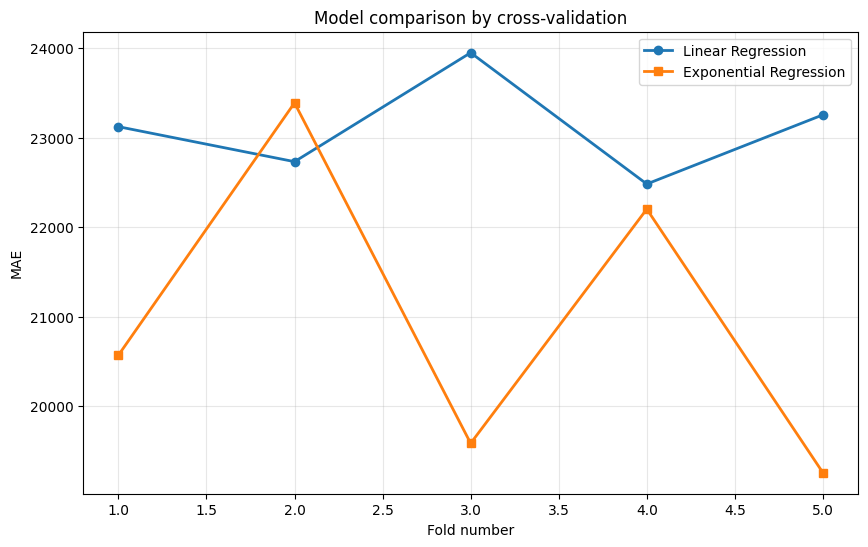

/tmp/ipython-input-2691054206.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([linear_mae_scores, exp_mae_scores],


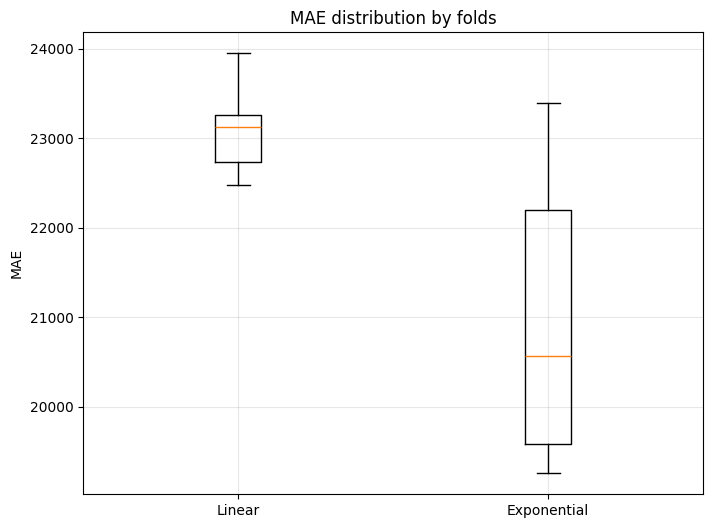

In [ ]:
import matplotlib.pyplot as plt

# Plot of model comparison by fold
plt.figure(figsize=(10, 6))

fold_numbers = range(1, 6)
plt.plot(fold_numbers, linear_mae_scores, 'o-', label='Linear Regression', linewidth=2)
plt.plot(fold_numbers, exp_mae_scores, 's-', label='Exponential Regression', linewidth=2)

plt.xlabel('Fold number')
plt.ylabel('MAE')
plt.title('Model comparison by cross-validation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot for comparison distributions
plt.figure(figsize=(8, 6))
plt.boxplot([linear_mae_scores, exp_mae_scores],
labels=['Linear', 'Exponential'])
plt.ylabel('MAE')
plt.title('MAE distribution by folds')
plt.grid(True, alpha=0.3)
plt.show()

### 5. Подбор гиперпараметров

Линейную регрессию почти всегда можно улучшить с помощью регуляризации. Но при этом у нас возникает **гиперпараметр** — коэффициент регуляризации, и подбирать его нужно правильно. Более подробно о подборе гиперпараметров вы можете прочитать в соответствующей главе учебника), а пока мы разберём самые базовые подходы.

В этой лабораторной вы познакомитесь с самым тривиальным способом — подбором по сетке. В данном случае это значит, что мы фиксируем несколько значений коэффициента регуляризации ```alpha``` и просто для каждого из них смотрим, что получится. Но важно отметить, что коэффициенты регуляризации стоит перебирать по _логарифмической_ сетке, например: `1e-2, 1e-1, 1, 1e+1, 1e+2`.

Разобравшись, что перебирать, перейдём к вопросу о том, как оценивать. Есть два основных подхода:

*   Train-Val-Test split. Датасет делится на три части, на одной модели учатся, на другой подбираются гиперпараметры, на третьей считаются финальные метрики. Этот метод довольно шумный, зато быстрый.
*   Кроссвалидация. Она значительно дольше, но надёжней. В этом пункте мы воспользуемся именно ей.


Возьмите класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) из scikit-learn и с его помощью подберите гиперпараметр ```alpha``` для линейной регрессии с L2-регуляризацией (соответствующий класс зовут Ridge). Возможно, для минимизации разных метрик (_root_mean_squared_logarithmic_error_ и _mean_absolute_error_) понадобятся разные значения гиперпараметров. Выберите из сетки ```np.logspace(-3, 3, num=7, base=10.)``` значение, которое максимизирует _root_mean_squared_logarithmic_error_ для _ExponentialLinearRegression_ и

**5. Загрузите оптимальное значение коэффициента регуляризации в Контест**.

Параметр `cv` оставьте дефолтным или возьмите `cv=5` (результат не поменяется). Будьте внимательны: по умолчанию `best_score_` у `GridSearchCV` - это _самое большое значение_. Чтобы не попасться в эту ловушку, обратите внимание на параметр `greater_is_better` функции `make_scorer`.

In [29]:
from sklearn.metrics import make_scorer
import numpy as np

# Creating scorers for GridSearch
rmsle_scorer = make_scorer(root_mean_squared_logarithmic_error, greater_is_better=False)
# greater_is_better=False because RMSLE - the smaller the better

In [37]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline

# Create a pipeline
pipeline = Pipeline([
  ('preprocessor', BaseDataPreprocessor(needed_columns=continuous_columns)),
  ('model', ExponentialLinearRegression())
])

# Parameter grid for iteration
param_grid = {
  'model__alpha': np.logspace(-3, 3, num=7, base=10.0) # [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

#kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Create GridSearch
grid_search = GridSearchCV(
  pipeline,
  param_grid,
  cv=5, # 5-fold cross-validation
  #cv=kf,
  scoring=rmsle_scorer,
  n_jobs=-1 # Use all processor cores
)

In [38]:
# Running grid search
print("Running hyperparameter fitting...")
grid_search.fit(data, data["Sale_Price"])

# Results
print("Best alpha:", grid_search.best_params_['model__alpha'])
print("Best RMSLE:", -grid_search.best_score_) # Negative due to greater_is_better=False

Running hyperparameter fitting...
Best alpha: 100.0
Best RMSLE: 0.17878710369588705


In [40]:
# View all results
results = pd.DataFrame(grid_search.cv_results_)
print("\nResults for all alphas:")
for i, alpha in enumerate(param_grid['model__alpha']):
  score = -results['mean_test_score'][i]
  print(f"alpha={alpha:.3f}, RMSLE={score:.4f}")


Results for all alphas:
alpha=0.001, RMSLE=0.1795
alpha=0.010, RMSLE=0.1795
alpha=0.100, RMSLE=0.1795
alpha=1.000, RMSLE=0.1794
alpha=10.000, RMSLE=0.1794
alpha=100.000, RMSLE=0.1788
alpha=1000.000, RMSLE=0.1807


### 6. Линейная модель своими руками

В этом разделе вы напишете собственный класс линейной модели, чтобы лучше разобраться, как работает обучение с помощью SGD.

Линейная модель делает предсказание по такой формуле:
$$
\hat{y_i} = \langle \vec{w}, \vec{x_i} \rangle + b
$$
Здесь $\vec{w}$ и b - обучаемые параметры. $\vec{x_i}$ - вектор фичей данного примера.
$\vec{w}$ и b находятся из задачи минимизации лосс функции:

$$
\vec{w}, b = {argmin}_{\vec{w}, b}(L) \ ; \ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 + \lambda \vec{w}^T\vec{w}
$$

Задачу минимизации лосс функции мы будем решать градиентным спуском. Для этого надо найти градиенты лосса по параметром модели.

$$
\nabla_b L = \frac{2}{N} sum(X \vec{w} + b - \vec{y})\\
\nabla_{\vec{w}} L = \frac{2}{N} X^T(X \vec{w} + b - \vec{y}) + 2\lambda \vec{w}
$$

Теперь давайте реализуем этот алгоритм ввиде класса с методами fit-predict.
Что в нем должно быть:
1. Класс должен называться ```SGDLinearRegressor```
2. Класс должен быть отнаследован от sklearn-овского класса [RegressorMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html)
3. Класс должен инициализироваться со следующими гиперпараметрами:

    a. ```lr``` — learning rate. Длина шага градиентного спуска

    b. ```regularization``` — коэффициент λ из формулы выше
    
    c. ```delta_converged``` — устанавливает условие окончание обучение. В тот момент когда норма разности весов на соседних шагах градиентного спуска меньше чем ```delta_converged``` алгоритм перкращает обновлять веса
    
    d. ```max_steps``` — максимальное число шагов градиентного спуска
    
    e. ```batch_size``` — размер батча

4. Реализуйте **стохастический** градиентный спуск. На каждом шагу градиентного спуска должен формироваться батч размера ```batch_size``` из матрицы признаков. Это нужно для того чтобы алгоритм быстрее сходился. Батч может выбираться случайно на каждом шаге градиентного спуска, либо каждую эпоху можно перемешивать трейн выборку и итерироваться батчами по ней.

Обратите внимание при реализации SGD на следующие моменты (частые ошибки):
* не перепутайте, какие коэффициенты в SGD стоят при самой функции потерь, а какие — при регуляризационном члене. Правильный вариант: $\frac{\alpha}{batch\_size}$ при градиенте MSE, $\alpha\lambda$ при градиенте регуляризатора.
* для остановки нужно сравнивать норму, а не ее квадрат
* для правильного решения нужно не итерироваться по батчу,  а перемножать матрицы (иначе не зайдет по TL)
* метод `predict` должен возвращать одномерный numpy array (не двумерный вектор-столбец формы (X.shape[1], 1))

In [52]:
import numpy as np
from sklearn.base import RegressorMixin, BaseEstimator
from sklearn.metrics import mean_absolute_error

class SGDLinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self,
                 lr=0.01, regularization=1., delta_converged=1e-3,
                 max_steps=1000,
                 batch_size=64):
        self.lr = lr
        self.regularization = regularization
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size

        self.W = None
        self.b = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0.0

        Y = Y.reshape(-1) if len(Y.shape) > 1 else Y

        for step in range(self.max_steps):
            # Keep old weights for convergence testing
            W_old = self.W.copy()
            b_old = self.b

            # Random batch
            batch_indices = np.random.choice(n_samples, size=self.batch_size, replace=False)
            X_batch = X[batch_indices]
            Y_batch = Y[batch_indices]

            # Predictions for the batch
            predictions = X_batch @ self.W + self.b

            # Gradients (using formulas from the condition)
            error = predictions - Y_batch

            # ∇b L = 2/N * sum(error)
            grad_b = (2 / self.batch_size) * np.sum(error)

            # ∇w L = 2/N * X^T @ error + 2λw
            grad_W = (2 / self.batch_size) * (X_batch.T @ error) + 2 * self.regularization * self.W

            # Update parameters
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b

            # Check convergence (weight difference norm)
            weight_diff_norm = np.linalg.norm(self.W - W_old) + abs(self.b - b_old)
            if weight_diff_norm < self.delta_converged:
                print(f"Convergence achieved at step {step}")
                break

        return self



    def predict(self, X):
        if self.W is None:
            raise ValueError("Model not fitted!")
        return (X @ self.W + self.b).reshape(-1)

In [53]:
# Check yourself

model = SGDLinearRegressor()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(Y_test.shape, prediction.shape)
print("MAE : ", mean_absolute_error(Y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(Y_test, prediction))

(586,) (586,)
MAE :  25706.48670726998
Mean log :  0.19131691982926324


In [54]:
from sklearn.base import RegressorMixin, BaseEstimator
import numpy as np

class SGDLinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, lr=0.01, regularization=1.0, delta_converged=1e-3,
                 max_steps=1000, batch_size=64):
        self.lr = lr
        self.regularization = regularization
        self.delta_converged = delta_converged
        self.max_steps = max_steps
        self.batch_size = batch_size

        self.W = None
        self.b = None

    def fit(self, X, y):
        n_features = X.shape[1]
        self.W = np.zeros(n_features)
        self.b = 0

        n_samples = X.shape[0]
        prev_W = np.zeros_like(self.W)
        prev_b = 0

        for step in range(self.max_steps):
            batch_indices = np.random.choice(n_samples, self.batch_size, replace=False)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]

            y_pred = X_batch @ self.W + self.b

            grad_W = (2/self.batch_size) * X_batch.T @ (y_pred - y_batch) + \
                    2 * self.regularization * self.W
            grad_b = (2/self.batch_size) * np.sum(y_pred - y_batch)

            self.W = self.W - self.lr * grad_W
            self.b = self.b - self.lr * grad_b

            W_diff = np.linalg.norm(self.W - prev_W)
            b_diff = abs(self.b - prev_b)
            if W_diff < self.delta_converged and b_diff < self.delta_converged:
                break

            prev_W = self.W.copy()
            prev_b = self.b

        return self

    def predict(self, X):
        return X @ self.W + self.b

In [55]:
# Check yourself

model = SGDLinearRegressor()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(Y_test.shape, prediction.shape)
print("MAE : ", mean_absolute_error(Y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(Y_test, prediction))

(586,) (586,)
MAE :  25391.275554798296
Mean log :  0.18652081297320316


In [56]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class SGDLinearRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, lr=0.01, regularization=1.0, delta_converged=1e-3,
                 max_steps=1000, batch_size=64):
        self.lr = lr
        self.regularization = regularization
        self.delta_converged = delta_converged
        self.max_steps = max_steps
        self.batch_size = batch_size

        self.W = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0  # 0 вместо 0.0

        prev_W = self.W.copy()
        prev_b = self.b

        for step in range(self.max_steps):
            batch_indices = np.random.choice(n_samples, self.batch_size, replace=False)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]

            predictions = X_batch @ self.W + self.b
            error = predictions - y_batch

            grad_W = (2 / self.batch_size) * (X_batch.T @ error) + 2 * self.regularization * self.W
            grad_b = (2 / self.batch_size) * np.sum(error)

            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b

            # Проверка сходимости КАК В РАБОЧЕМ ВАРИАНТЕ
            W_diff = np.linalg.norm(self.W - prev_W)
            b_diff = abs(self.b - prev_b)
            if W_diff < self.delta_converged and b_diff < self.delta_converged:
                break

            prev_W = self.W.copy()
            prev_b = self.b

        return self

    def predict(self, X):
        return X @ self.W + self.b  # ← БЕЗ reshape

In [59]:
# Check yourself

model = SGDLinearRegressor()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(Y_test.shape, prediction.shape)
print("MAE : ", mean_absolute_error(Y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(Y_test, prediction))

(586,) (586,)
MAE :  25316.522890617798
Mean log :  0.18764892025120658


### 7. Категориальные признаки

В самом начале ноутбука мы отбросили категориальные фичи, хотя они могут помочь нам сделать модель лучше. Давайте же научимся ими пользоваться.

Самый простой подход — это закодировать значения категориального признака числами, скажем, от $0$ до $C-1$, где $C$ — количество значений категориального признака. Иногда это может сработать, но для этого нужно, чтобы между значениями признака были определены отношения больше/меньше (такие признаки называются _ординальными_), причём соотношения между значениями должны быть более-менее линейными. В целом, не очень частая ситуация, поэтому так мы делать не будем.

Вместо этого мы будем использовать OneHotEncoding. Пусть некоторая категориальная фича имеет $C$ уникальных значений. Давайте эту фичу закодируем в виде $C$ столбцов, каждый из которых соответствует некоторому уникальному значению категориальной фичи. Для каждого элемента выборки будем класть единичку в столбец, соответствующий этой фиче, и нолики в остальные.

У этого метода есть недостаток. Если категориальная фича принимает слишком много значений, то вы нагенерируете много новых столбцов, каждый из которых будет содержать мало информации. Из-за них моделька может переобучиться.

Этот метод имплементирован [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). У него есть пара важных гиперпараметров, которые стоит упомянуть:
- ```handle_unknown``` - управляет обработкой незнакомых категорий на этапе `transform`. Число уникальных значений (и число столбцов) настраивается на обучающей выборке, и при дальнейшем применении может появиться значение, которого ещё не было. Если указать ```handle_unknown="ignore"```, все поля для такого объекта будут заполнены нулями.
- ```drop``` - если делать one-hot-encoding так как это описано выше, то сумма всех столбцов, соответствующих значениям категориальной фичи, будет равна единичному вектору. А такой вектор уже есть (он соответствует свободному члену). То есть признаки становятся линейно зависимыми, и это сломает процесс обучения линейной модели. Поэтому есть смысл для каждой фичи отбрасывать одну из получившихся колонок (```drop="first"```) или хотя бы делать это только для бинарных фичей (```drop="if_binary"```)

В этом пункте вам надо еще раз предобработать данные, добавив в них часть категориальных фичей, закодированных OneHotEncoding-ом. После этого обучите классификатор заново и выбейте лучшую метрику на тестовой выборке. А именно, мы добавим фичи "Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning". Используйте значение параметра handle_unknown="ignore".

*На практике в некоторых версиях scikit-learn есть проблема с совместимостью `handle_unknown="ignore"` и `drop="first"` одновременно, поэтому вторым можно пожертвовать.

Класс будет наследоваться от BaseDataPreprocessor, так что в него можно будет передавать нужные для BaseDataPreprocessor параметры. Также это позволит не переписывать заново то, что происходит в базовом классе, а просто взывать к ним с помощью конструкции `super`.

In [64]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

interesting_columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]

class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, **kwargs):
        super(OneHotPreprocessor, self).__init__(**kwargs)
        self.onehot_encoder = OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False
        )
        self.categorical_columns = interesting_columns

    def fit(self, data, *args):
        super().fit(data, *args)

        categorical_data = data[self.categorical_columns]
        self.onehot_encoder.fit(categorical_data)

        print(f"OneHot created {len(self.onehot_encoder.get_feature_names_out())} new features")

        return self

    def transform(self, data):
        continuous_features = super().transform(data)

        categorical_data = data[self.categorical_columns]
        onehot_features = self.onehot_encoder.transform(categorical_data)

        combined_features = np.hstack([continuous_features, onehot_features])

        return combined_features

Обучите модель с добавленными категориальными фичами. Получилось ли улучшить её качество?

In [65]:
preprocessor = OneHotPreprocessor(needed_columns=continuous_columns)
preprocessor.fit(data_train)

X_train_processed = preprocessor.transform(data_train)
X_test_processed = preprocessor.transform(data_test)

model = Ridge(alpha=10.0)
model.fit(X_train_processed, Y_train)

train_predictions = model.predict(X_train_processed)
test_predictions = model.predict(X_test_processed)

print("Train RMSLE:", root_mean_squared_logarithmic_error(Y_train, train_predictions))
print("Test RMSLE:", root_mean_squared_logarithmic_error(Y_test, test_predictions))

OneHot created 29 new features
Train RMSLE: 0.15268268488148043
Test RMSLE: 0.16191331969691516


### 8. Pipeline

Представьте ситуацию. Прошел месяц с того момента, как вы построили модель, а теперь вам надо дообучить её на новых данных и активно применять для предсказания. Если вы не позаботились об инфраструктуре, то вам придётся рыскать по всему ноутбуку в поисках того, как вы предобрабатывали данные, какую модель учили, обязательно что-нибудь забудете и будете очень страдать. Поэтому человечество придумало пайплайны, которые позволяют объединить предобработку данных и обучение модели в один класс — pipeline. Его можно писать самому, либо взять из sklearn ([link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)).

**7. Напишите пайплайн, объединяющий использованную нами базовую предобработку данных (BaseDataPreprocessor и OneHotPreprocessor), а также линейную регрессию с L2-регуляризацией, и сдайте его в Контест.**

In [67]:
from sklearn.pipeline import Pipeline

def make_ultimate_pipeline():
    pipeline = Pipeline([
        ('preprocessor', OneHotPreprocessor(needed_columns=continuous_columns)),
        ('model', ExponentialLinearRegression(alpha=10.0))
    ])
    return pipeline

В этом пункте вы попробуете сделать что-то поинтереснее и загрузите плоды ваших трудов в Контест.

Попробуйте усовершенствовать предобработку данных, добавляя или выкидывая фичи, придумывая функции от признаков так, чтобы улучшить качество классификатора.

Ещё несколько базовых идей о том, что можно было бы попробовать:

- Постройте гистограммы значений признаков. Вы обнаружите, что некоторые из них почти всегда принимают одно и то же значение. Для начала их можно просто выкинуть.
- Почистите выбросы. У некоторых объектов значения каких-то признаков могут сильно выбиваться, и это будет мешать регрессии обучиться. Вообще говоря, такие объекты можно выкидывать, но с текущей архитектурой пайплайна вам будет трудно это настроить. Так что вы можете пока заменять их на более разумные значения.
- Мы добавили лишь несколько категориальных признаков, а на самом деле многие из них могут быть полезными.
- Можно дискретизовать непрерывные фичи. Самый банальный пример: если непрерывная фича принимает всего несколько значений, её можно попробовать проинтерпретировать, как категориальную, и подать в one-hot энкодер. Но можно и как-то ещё разбивать по порогам.
- Можно делать и более сложные преобразования. Например в датасете есть координаты квартиры, которые по идее сами по себе мало чего дают нашему регрессору. С другой стороны, по ним можно оценить центр города (или просто найти его на карте) и использовать в качестве фичи расстояние до центра города, которое может естественным образом влиять на цену жилья.
- Не забывайте настраивать коэффициент регуляризации: для разных датасетов оптимальное значение будет разным.

**В контест вам нужно будет сдать свой класс модели**. Он будет обучаться и тестироваться на новом и неизвестном вам разбиении датасета на трейн и тест по метрике `root_mean_squared_logarithmic_error`.
В контесте будет специально проверено, что вы сдаёте именно `Pipeline`.

Не забывайте, что вместе с пайплайном вам нужно отправить и все самописные классы, которые в нём участвуют.


In [74]:
# Контекст просто отваливается на проверке, явно не стоит на него полагаться.
# Остановился на требовании: Напишите пайплайн, объединяющий использованную нами базовую предобработку
# данных (BaseDataPreprocessor и OneHotPreprocessor), а также линейную регрессию с L2-регуляризацией, и сдайте его в Контест.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
import pandas as pd
import numpy as np
from typing import Optional, List

# 1. Continuous columns (базовый набор)
continuous_columns = ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
                     'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
                     'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
                     'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
                     'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
                     'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
                     'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch',
                     'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold',
                     'Longitude', 'Latitude']

# 2. Категориальные фичи (только те, что указаны)
interesting_columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]

# 3. BaseDataPreprocessor (минимальная версия)
class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]] = None):
        self.needed_columns = needed_columns
        self.scaler = StandardScaler()
        self.fitted_columns = None

    def fit(self, data, *args):
        if self.needed_columns is None:
            self.fitted_columns = data.columns.tolist()
        else:
            self.fitted_columns = self.needed_columns
        self.scaler.fit(data[self.fitted_columns])
        return self

    def transform(self, data):
        return self.scaler.transform(data[self.fitted_columns])

# 4. OneHotPreprocessor (наследуется от BaseDataPreprocessor)
class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        self.categorical_columns = interesting_columns

    def fit(self, data, *args):
        super().fit(data, *args)
        self.onehot_encoder.fit(data[self.categorical_columns])
        return self

    def transform(self, data):
        continuous = super().transform(data)
        categorical = self.onehot_encoder.transform(data[self.categorical_columns])
        return np.hstack([continuous, categorical])

# 5. Функция для контеста (только она!)
def make_ultimate_pipeline():
    return Pipeline([
        ('preprocessor', OneHotPreprocessor(needed_columns=continuous_columns)),
        ('model', Ridge(alpha=1.0))  # L2-регуляризация как просят
    ])

In [75]:

pipeline = make_ultimate_pipeline()

pipeline.fit(data_train, Y_train)

predictions = pipeline.predict(data_test)

mae = mean_absolute_error(Y_test, predictions)
print(f"MAE: {mae}")

rmsle = root_mean_squared_logarithmic_error(Y_test, predictions)
print(f"RMSLE: {rmsle}")

MAE: 18303.66640040049
RMSLE: 0.15713447894728083
